In [1]:
from tqdm import tqdm
import pandas as pd

import chronos as cr

cc = cr.ClusterCatalog()
df_mem = cc.query_catalog(return_members=True)

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Some parallaxes are negative in Bouma2019!
These are removed for the meantime.
For proper treatment, see:
https://arxiv.org/pdf/1804.09366.pdf



## query gaiaid of new TOIs

In [2]:
tois = cr.get_tois(clobber=True, verbose=True)
tois.tail(3)

TOIs with TFPWG disposition==FP are removed.

Saved: /home/jp/github/research/project/chronos/chronos/../data/TOIs.csv



,TIC ID,TOI,Previous CTOI,Master,SG1A,SG1B,SG2,SG3,SG4,SG5,...,Stellar Metallicity,Stellar Metallicity err,Sectors,Date TOI Alerted (UTC),Date TOI Updated (UTC),Date Modified,Comments,FPP,FPP-2m,FPP-30m
1316,371234684.0,1731.01,NaN,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,0.08,0.1,20,2020-02-19 23:47:13,2020-02-19 23:47:13,2020-02-20 12:00:19,HAT-P-9b,NaN,NaN,NaN
1317,470987100.0,1732.01,NaN,2.0,4.0,2.0,2.0,1.0,4.0,4.0,...,NaN,NaN,20,2020-02-19 23:47:13,2020-02-19 23:47:13,2020-02-20 12:00:20,NaN,NaN,NaN,NaN
1318,53427308.0,1733.01,NaN,3.0,4.0,3.0,3.0,1.0,4.0,4.0,...,NaN,NaN,20,2020-02-20 00:14:52,2020-02-20 15:23:13,2020-02-20 12:00:20,Small depth-aperture correlation; odd/even not...,NaN,NaN,NaN


## update pre-querried TOI gaia IDs

In [3]:
tois_gaia = cr.query_gaia_params_of_all_tois(clobber=False, update=True)
tois_gaia.source_id = tois_gaia.source_id.astype(int)

Loaded: /home/jp/github/research/project/chronos/chronos/../data/TOIs.csv
Querying Gaia DR2 catalog for new TOIs



  0%|          | 0/1389 [00:00<?, ?it/s]

Querying Gaia DR2 catalog for 98.5032 41.9008 within 3.0 arcsec.



 97%|█████████▋| 1353/1389 [00:03<00:00, 396.40it/s]

Querying Gaia DR2 catalog for 125.189 46.2036 within 3.0 arcsec.

Querying Gaia DR2 catalog for 126.089 42.1047 within 3.0 arcsec.

Querying Gaia DR2 catalog for 99.8982 42.1313 within 3.0 arcsec.

Querying Gaia DR2 catalog for 111.559 32.3838 within 3.0 arcsec.

Querying Gaia DR2 catalog for 113.874 49.4781 within 3.0 arcsec.

Querying Gaia DR2 catalog for 114.933 28.1201 within 3.0 arcsec.

Querying Gaia DR2 catalog for 132.635 82.9271 within 3.0 arcsec.

Querying Gaia DR2 catalog for 285.206 60.2337 within 3.0 arcsec.



 97%|█████████▋| 1353/1389 [00:20<00:00, 396.40it/s]

Querying Gaia DR2 catalog for 101.382 31.4655 within 3.0 arcsec.



 98%|█████████▊| 1362/1389 [00:20<00:15,  1.76it/s] 

Querying Gaia DR2 catalog for 116.107 43.0091 within 3.0 arcsec.



 98%|█████████▊| 1363/1389 [00:22<00:24,  1.07it/s]

Querying Gaia DR2 catalog for 118.63 45.8078 within 3.0 arcsec.



 98%|█████████▊| 1364/1389 [00:23<00:27,  1.09s/it]

Querying Gaia DR2 catalog for 94.2838 76.211 within 3.0 arcsec.



 98%|█████████▊| 1365/1389 [00:26<00:38,  1.61s/it]

Querying Gaia DR2 catalog for 124.447 51.0104 within 3.0 arcsec.



 98%|█████████▊| 1366/1389 [00:28<00:39,  1.71s/it]

Querying Gaia DR2 catalog for 127.946 44.8323 within 3.0 arcsec.



 98%|█████████▊| 1367/1389 [00:29<00:34,  1.59s/it]

Querying Gaia DR2 catalog for 100.521 39.8429 within 3.0 arcsec.



 98%|█████████▊| 1368/1389 [00:31<00:32,  1.54s/it]

Querying Gaia DR2 catalog for 113.184 33.835 within 3.0 arcsec.



 99%|█████████▊| 1369/1389 [00:32<00:29,  1.49s/it]

Querying Gaia DR2 catalog for 79.0735 79.7377 within 3.0 arcsec.



 99%|█████████▊| 1370/1389 [00:35<00:37,  1.99s/it]

Querying Gaia DR2 catalog for 105.083 56.8242 within 3.0 arcsec.



 99%|█████████▊| 1371/1389 [00:37<00:33,  1.86s/it]

Querying Gaia DR2 catalog for 104.629 67.6773 within 3.0 arcsec.



 99%|█████████▉| 1372/1389 [00:38<00:31,  1.83s/it]

Querying Gaia DR2 catalog for 112.018 30.3217 within 3.0 arcsec.



 99%|█████████▉| 1373/1389 [00:40<00:27,  1.69s/it]

Querying Gaia DR2 catalog for 135.297 55.8599 within 3.0 arcsec.



 99%|█████████▉| 1374/1389 [00:41<00:23,  1.55s/it]

Querying Gaia DR2 catalog for 117.027 50.2251 within 3.0 arcsec.



 99%|█████████▉| 1375/1389 [00:43<00:24,  1.74s/it]

Querying Gaia DR2 catalog for 110.388 58.2681 within 3.0 arcsec.



 99%|█████████▉| 1376/1389 [00:45<00:22,  1.76s/it]

Querying Gaia DR2 catalog for 114.345 61.1539 within 3.0 arcsec.



 99%|█████████▉| 1377/1389 [00:47<00:21,  1.83s/it]

Querying Gaia DR2 catalog for 116.797 68.4767 within 3.0 arcsec.



 99%|█████████▉| 1378/1389 [00:49<00:20,  1.83s/it]

Querying Gaia DR2 catalog for 127.033 56.4275 within 3.0 arcsec.



 99%|█████████▉| 1379/1389 [00:50<00:17,  1.75s/it]

Querying Gaia DR2 catalog for 97.6366 29.6723 within 3.0 arcsec.



 99%|█████████▉| 1380/1389 [00:55<00:23,  2.56s/it]

Querying Gaia DR2 catalog for 117.479 27.3631 within 3.0 arcsec.



 99%|█████████▉| 1381/1389 [00:56<00:18,  2.27s/it]

Querying Gaia DR2 catalog for 93.5585 53.1359 within 3.0 arcsec.



 99%|█████████▉| 1382/1389 [00:59<00:16,  2.30s/it]

Querying Gaia DR2 catalog for 120.612 64.7972 within 3.0 arcsec.



100%|█████████▉| 1383/1389 [01:01<00:13,  2.25s/it]

Querying Gaia DR2 catalog for 278.4 58.2055 within 3.0 arcsec.



100%|█████████▉| 1384/1389 [01:05<00:14,  2.92s/it]

Querying Gaia DR2 catalog for 107.866 48.3279 within 3.0 arcsec.



100%|█████████▉| 1385/1389 [01:07<00:10,  2.61s/it]

Querying Gaia DR2 catalog for 107.866 48.3279 within 3.0 arcsec.



100%|█████████▉| 1386/1389 [01:08<00:05,  1.95s/it]

Querying Gaia DR2 catalog for 110.168 37.1406 within 3.0 arcsec.



100%|█████████▉| 1387/1389 [01:09<00:03,  1.82s/it]

Querying Gaia DR2 catalog for 111.801 53.0453 within 3.0 arcsec.



100%|█████████▉| 1388/1389 [01:11<00:01,  1.86s/it]

Querying Gaia DR2 catalog for 118.882 54.5966 within 3.0 arcsec.



100%|██████████| 1389/1389 [01:13<00:00, 18.96it/s]


Saved: /home/jp/github/research/project/chronos/chronos/../data/toi_gaia_params.hdf5


In [5]:
tois_gaia.tail(3)

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,distance
TOI,,,,,,,,,,,,,,,,,,,,,
1731.01,1635721458409799680,Gaia DR2 898130030131443584,898130030131443584,1511459227,2015.5,110.169,0.0368043,37.1406,0.0383275,2.1687,...,0.0257,0.154,200111,1.21124,1.18352,1.23303,2.13625,2.07648,2.19602,0.000748855
1732.01,1635721458409799680,Gaia DR2 983858058396166016,983858058396166016,770581376,2015.5,111.801,0.0308595,53.0453,0.0277456,13.3474,...,0.223,0.4831,200111,0.571029,0.515282,0.592507,0.0812664,0.0809028,0.08163,0.000273982
1733.01,1635721458409799680,Gaia DR2 984853528735318784,984853528735318784,32832144,2015.5,118.882,0.0320286,54.5966,0.0274599,3.95135,...,0.0459,0.3218,200111,1.49876,1.33087,1.63537,2.24368,2.2104,2.27696,0.000534693


In [6]:
idx1 = df_mem.source_id.isin(tois_gaia.source_id)
idx1.sum()

119

In [7]:
df_mem.columns

Index(['source_id', 'clusters', 'reference', 'ext_catalog_name', 'ra', 'dec',
       'pmra', 'pmdec', 'parallax', 'phot_g_mean_mag', 'phot_bp_mean_mag',
       'phot_rp_mean_mag', 'k13_name_match', 'Cluster', 'how_match',
       'not_in_k13', 'comment', 'k13_logt', 'k13_e_logt', 'distance'],
      dtype='object')

In [8]:
idx2 = tois_gaia.source_id.isin(df_mem.source_id)
idx2.sum()

119

In [9]:
idx1 = df_mem.source_id.isin(tois_gaia.source_id)
idx2 = tois_gaia.source_id.isin(df_mem.source_id)

#merge
cols = ['source_id','clusters','reference','Cluster','k13_name_match','k13_logt','distance']
short_list = pd.merge(left=tois_gaia.loc[idx2, 'source_id'].reset_index(),
                      right=df_mem.loc[idx1, cols], 
                     on='source_id')

In [10]:
len(short_list.Cluster.dropna())

14

In [11]:
len(short_list.clusters.dropna())

14

In [12]:
short_list = short_list.loc[short_list.Cluster.dropna().index] 
short_list

,TOI,source_id,clusters,reference,Cluster,k13_name_match,k13_logt,distance
9,580.01,5519619186857962112,"Pozzo_1,nan,Pozzo_1,nan","CantatGaudin_2018,Zari_2018_UMS,CantatGaudin_2...",Vel_OB2,Vel_OB2,NaN,349.831608
10,581.01,5525188767305211904,"Trumpler_10,nan,Trumpler_10,nan","CantatGaudin_2018,Zari_2018_UMS,CantatGaudin_2...",Trumpler_10,Trumpler_10,7.380,439.535656
21,681.01,5290968085934209152,"NGC_2516,NGC2516,nan,NGC_2516,NGC2516,nan","CantatGaudin_2018,GaiaCollaboration2018_tab1b,...",NGC_2516,NGC_2516,8.475,426.487488
25,837.01,5251470948229949568,"IC2602,IC_2602,IC_2602","GaiaCollaboration2018_tab1a,CantatGaudin_2018,...",IC_2602,IC_2602,8.345,143.076438
27,839.01,5337273743301313536,Loden 306,Dias2014,Loden_306,Loden_306,6.760,1704.358636
28,861.01,5290721997195236480,"NGC_2516,nan,NGC_2516,nan","CantatGaudin_2018,Zari_2018_UMS,CantatGaudin_2...",NGC_2516,NGC_2516,8.475,427.475694
32,893.01,3099242937596214272,NGC 2306,Dias2014,NGC_2306,NGC_2306,9.000,1283.226910
75,1336.01,2058880504233056768,Ruprecht 172,Dias2014,Ruprecht_172,Ruprecht_172,9.065,532.174383
90,1497.01,2014335027560174976,"RSG_7,nan,RSG_7,nan","CantatGaudin_2018,Zari_2018_UMS,CantatGaudin_2...",RSG_7,NaN,NaN,409.904768
98,1535.01,427614644875238528,"NGC 225,NGC_225","Dias2014,CantatGaudin_2018",NGC_225,NGC_225,8.191,708.443293


In [12]:
toi_short_list = tois[tois.TOI.astype(float).isin(short_list.TOI.astype(float).tolist())]

In [13]:
short_list = pd.merge(left=short_list,
                      right=toi_short_list, 
                     on='TOI')

In [14]:
clobber=True

if clobber:
    short_list.to_csv('../data/tois_in_cluster.csv')
else:
    short_list = pd.read_csv('../data/tois_in_cluster.csv')

In [15]:
short_list.columns

Index(['TOI', 'source_id', 'clusters', 'reference', 'Cluster',
       'k13_name_match', 'k13_logt', 'distance', 'TIC ID', 'Previous CTOI',
       'Master', 'SG1A', 'SG1B', 'SG2', 'SG3', 'SG4', 'SG5', 'ACWG',
       'TESS Disposition', 'TFOPWG Disposition', 'TESS Mag', 'TESS Mag err',
       'Planet Name', 'Planet Num', 'Source', 'RA', 'Dec', 'PM RA (mas/yr)',
       'PM RA err (mas/yr)', 'PM Dec (mas/yr)', 'PM Dec err (mas/yr)',
       'Epoch (BJD)', 'Epoch (BJD) err', 'Period (days)', 'Period (days) err',
       'Duration (hours)', 'Duration (hours) err', 'Depth (mmag)',
       'Depth (mmag) err', 'Depth (ppm)', 'Depth (ppm) err',
       'Planet Radius (R_Earth)', 'Planet Radius (R_Earth) err',
       'Planet Insolation (Earth Flux)', 'Planet Equil Temp (K)', 'Planet SNR',
       'Stellar Distance (pc)', 'Stellar Distance (pc) err',
       'Stellar Eff Temp (K)', 'Stellar Eff Temp (K) err',
       'Stellar log(g) (cm/s^2)', 'Stellar log(g) (cm/s^2) err',
       'Stellar Radius (R_Sun)

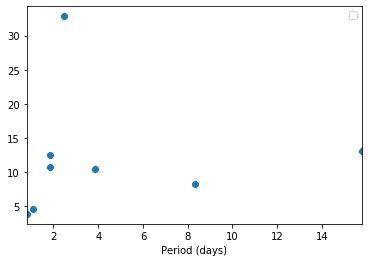

In [16]:
short_list.plot(x='Period (days)', y='Planet Radius (R_Earth)', marker='o', ls='', label='__no_legend__')

In [17]:
short_list[['TOI','Period (days)','Planet Radius (R_Earth)']].sort_values(by='Period (days)')

,TOI,Period (days),Planet Radius (R_Earth)
8,1497.01,0.815800,3.866670
11,1673.01,1.086250,4.651220
1,581.01,1.388460,NaN
0,580.01,1.549590,NaN
9,1585.01,1.836410,10.739900
10,1641.01,1.864989,12.538129
4,839.01,2.485338,32.826550
7,1336.01,3.862830,10.456300
6,893.01,5.590710,NaN
3,837.01,8.322729,8.240570


In [18]:
cluster_planets = {}

#idx = tois_gaia.source_id.astype(int).isin(df_mem.source_id)

for toi in tqdm(short_list.TOI.tolist()): 
    gaiaid = tois_gaia.loc[toi,'source_id']
    t = cr.Target(gaiaDR2id=gaiaid, verbose=False)
    idx = df_mem.source_id.isin([t.gaiaid])
    if idx.sum()>0:
        #find nearest cluster
        try:
            cluster = t.find_nearest_cluster_member(match_id=True)
            cluster_planets[toi]=(t.gaiaid, cluster)
        except Exception as e:
            print(e)

  0%|          | 0/12 [00:00<?, ?it/s]

Some parallaxes are negative in Bouma2019!
These are removed for the meantime.
For proper treatment, see:
https://arxiv.org/pdf/1804.09366.pdf



  8%|▊         | 1/12 [00:06<01:11,  6.49s/it]

Target is in Vel_OB2 (Bouma2019)!
Some parallaxes are negative in Bouma2019!
These are removed for the meantime.
For proper treatment, see:
https://arxiv.org/pdf/1804.09366.pdf



 17%|█▋        | 2/12 [00:12<01:03,  6.39s/it]

Target is in Trumpler_10 (Bouma2019)!
Some parallaxes are negative in Bouma2019!
These are removed for the meantime.
For proper treatment, see:
https://arxiv.org/pdf/1804.09366.pdf



 25%|██▌       | 3/12 [00:17<00:54,  6.06s/it]

Target is in NGC_2516 (Bouma2019)!
Some parallaxes are negative in Bouma2019!
These are removed for the meantime.
For proper treatment, see:
https://arxiv.org/pdf/1804.09366.pdf



 33%|███▎      | 4/12 [00:22<00:45,  5.65s/it]

Target is in IC_2602 (Bouma2019)!
Some parallaxes are negative in Bouma2019!
These are removed for the meantime.
For proper treatment, see:
https://arxiv.org/pdf/1804.09366.pdf



 42%|████▏     | 5/12 [00:28<00:39,  5.68s/it]

Target is in Loden_306 (Bouma2019)!
Some parallaxes are negative in Bouma2019!
These are removed for the meantime.
For proper treatment, see:
https://arxiv.org/pdf/1804.09366.pdf



 50%|█████     | 6/12 [00:33<00:33,  5.63s/it]

Target is in NGC_2516 (Bouma2019)!
Some parallaxes are negative in Bouma2019!
These are removed for the meantime.
For proper treatment, see:
https://arxiv.org/pdf/1804.09366.pdf



 58%|█████▊    | 7/12 [00:39<00:27,  5.48s/it]

Target is in NGC_2306 (Bouma2019)!
Some parallaxes are negative in Bouma2019!
These are removed for the meantime.
For proper treatment, see:
https://arxiv.org/pdf/1804.09366.pdf



 67%|██████▋   | 8/12 [00:44<00:21,  5.44s/it]

Target is in Ruprecht_172 (Bouma2019)!
Some parallaxes are negative in Bouma2019!
These are removed for the meantime.
For proper treatment, see:
https://arxiv.org/pdf/1804.09366.pdf



 75%|███████▌  | 9/12 [00:49<00:16,  5.36s/it]

Target is in RSG_7 (Bouma2019)!
Some parallaxes are negative in Bouma2019!
These are removed for the meantime.
For proper treatment, see:
https://arxiv.org/pdf/1804.09366.pdf



 83%|████████▎ | 10/12 [00:55<00:11,  5.60s/it]

Target is in Stock_20 (Bouma2019)!
Some parallaxes are negative in Bouma2019!
These are removed for the meantime.
For proper treatment, see:
https://arxiv.org/pdf/1804.09366.pdf



 92%|█████████▏| 11/12 [01:03<00:06,  6.22s/it]

Target is in NGC_1039 (Bouma2019)!
Some parallaxes are negative in Bouma2019!
These are removed for the meantime.
For proper treatment, see:
https://arxiv.org/pdf/1804.09366.pdf



100%|██████████| 12/12 [01:08<00:00,  5.68s/it]

Target is in Waterloo_1 (Bouma2019)!


Querying Gaia DR2 catalog for 123.108 -46.1092 within 3.0 arcsec.

Some parallaxes are negative in Bouma2019!
These are removed for the meantime.
For proper treatment, see:
https://arxiv.org/pdf/1804.09366.pdf

Loaded: /home/jp/github/research/project/chronos/chronos/../data/Vel_OB2_members.hdf5
Querying Gaia DR2 catalog for 130.262 -41.4428 within 3.0 arcsec.

Some parallaxes are negative in Bouma2019!
These are removed for the meantime.
For proper treatment, see:
https://arxiv.org/pdf/1804.09366.pdf

Loaded: /home/jp/github/research/project/chronos/chronos/../data/Trumpler_10_members.hdf5
Querying Gaia DR2 catalog for 117.895 -60.4124 within 3.0 arcsec.

Some parallaxes are negative in Bouma2019!
These are removed for the meantime.
For proper treatment, see:
https://arxiv.org/pdf/1804.09366.pdf

Loaded: /home/jp/github/research/project/chronos/chronos/../data/NGC_2516_members.hdf5
Querying Gaia DR2 catalog for 157.037 -64.5053 within 3.0 arcsec.

Some parallaxes are negative in Bouma

ValueError: radial_velocity is not available

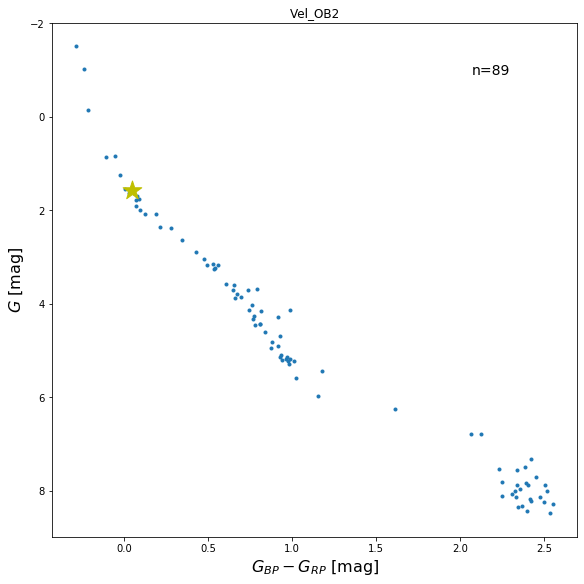

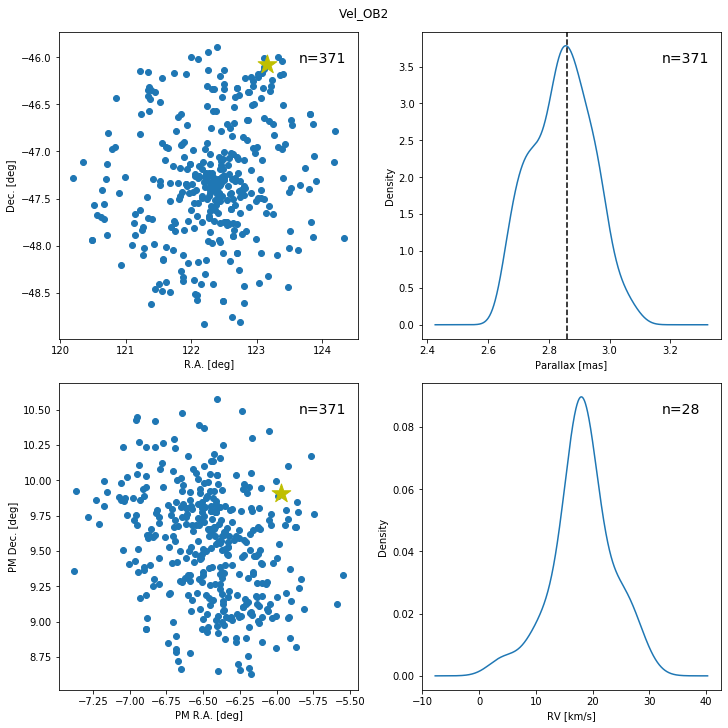

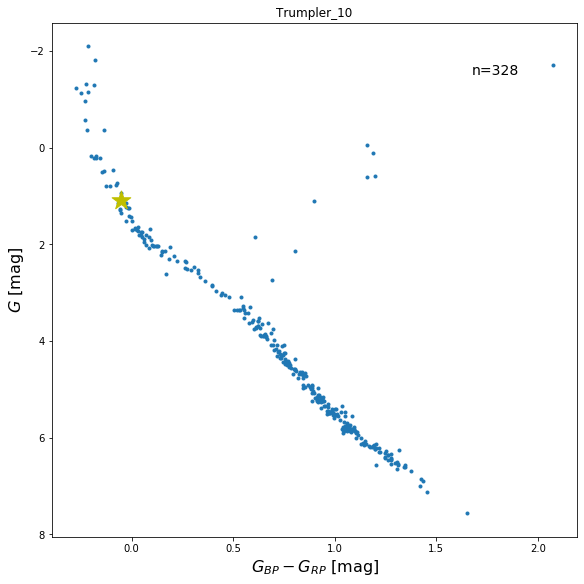

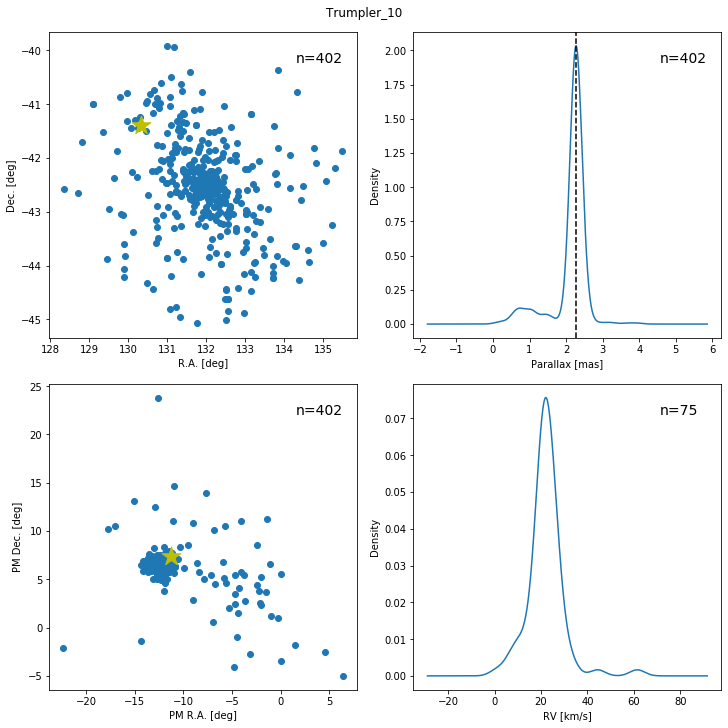

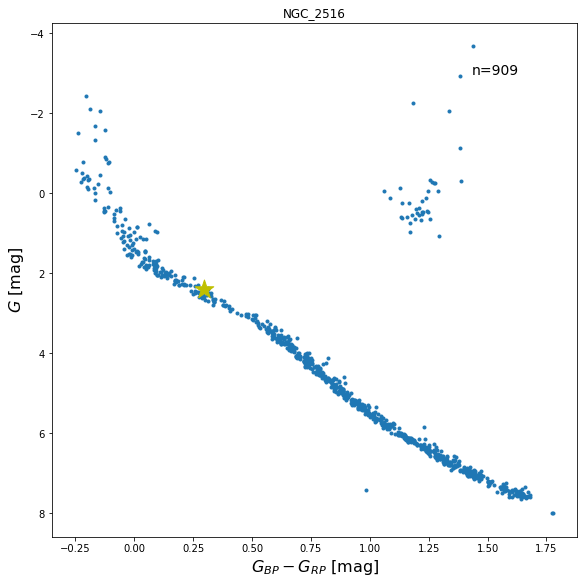

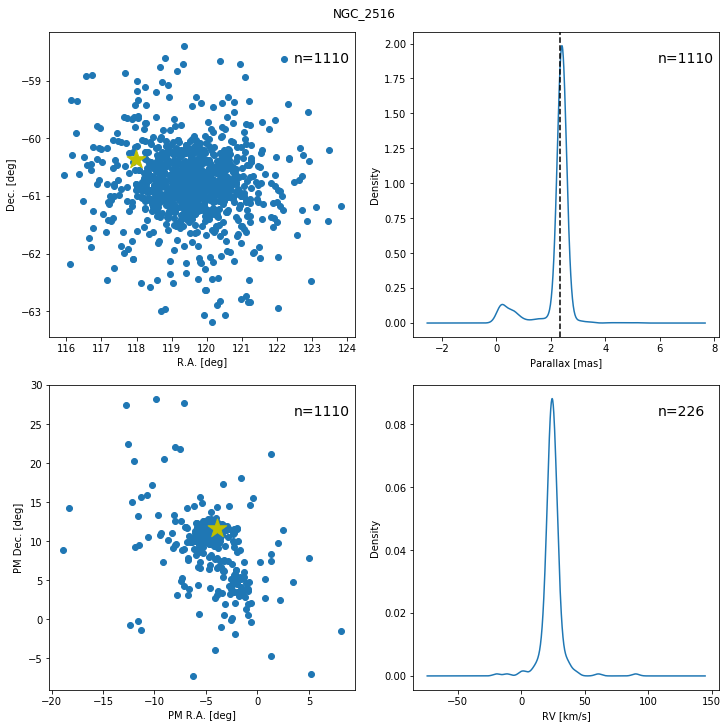

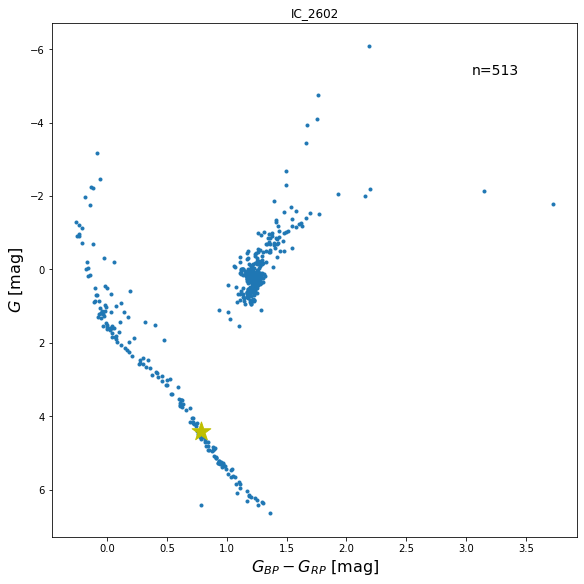

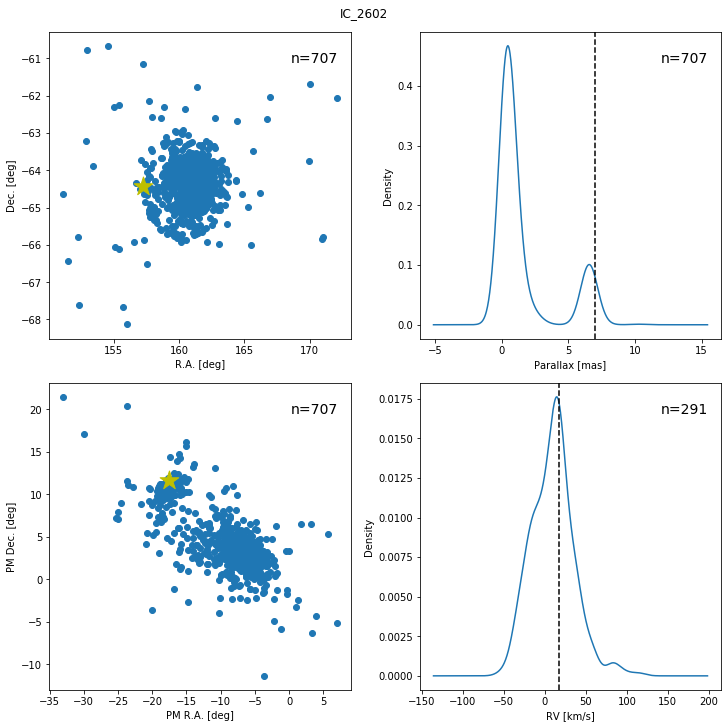

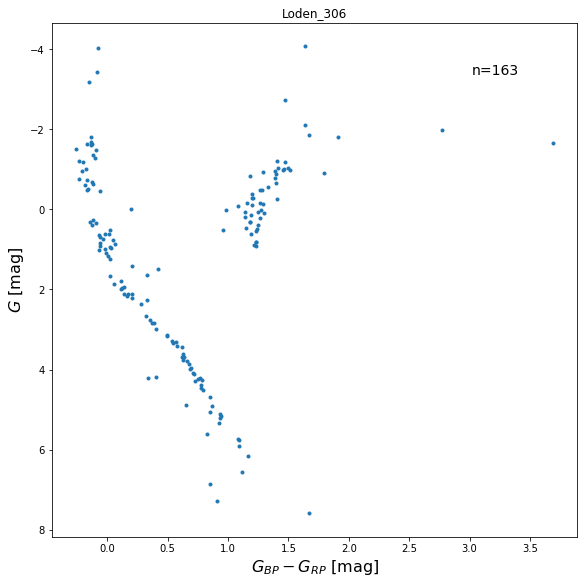

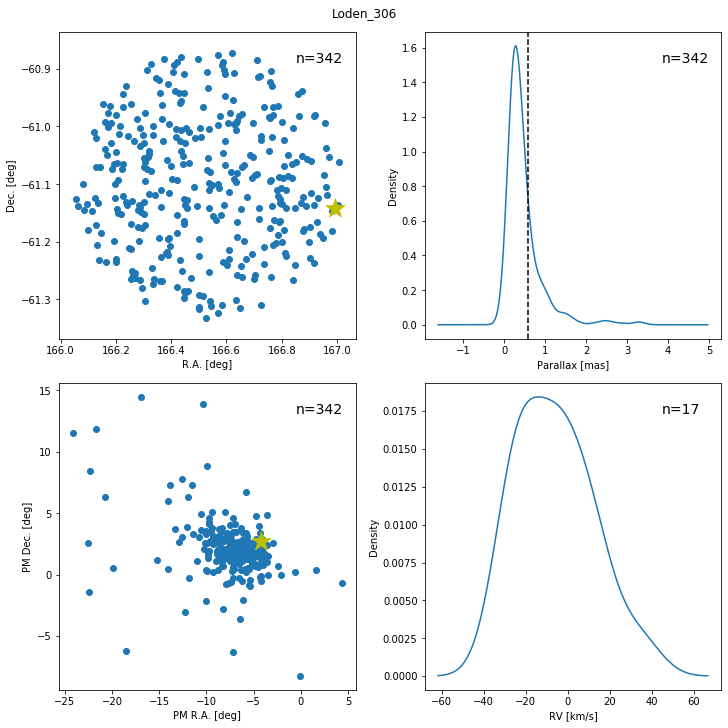

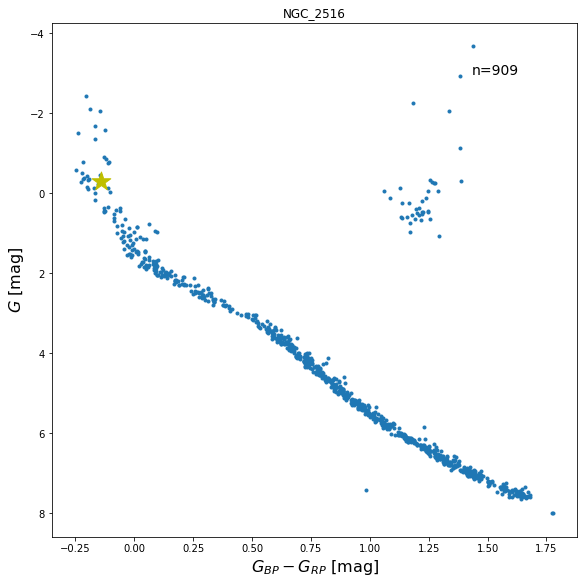

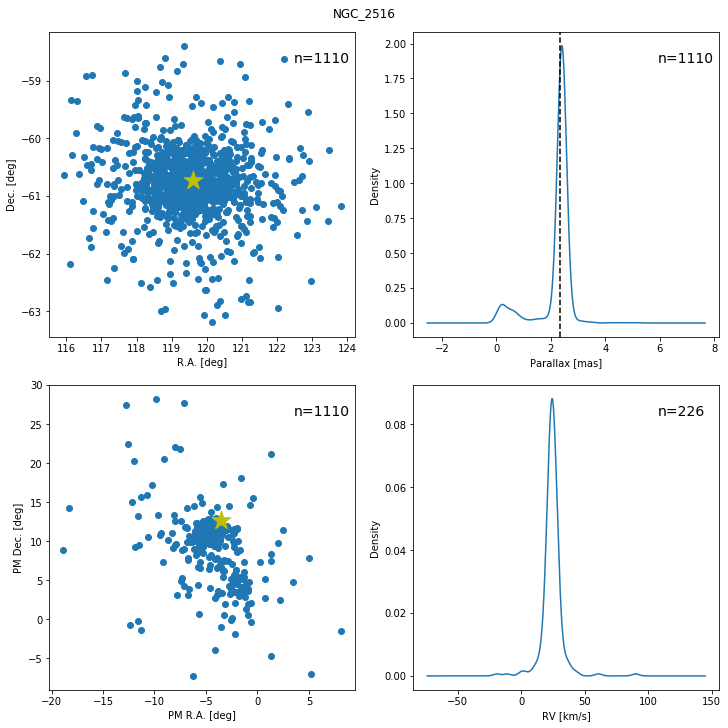

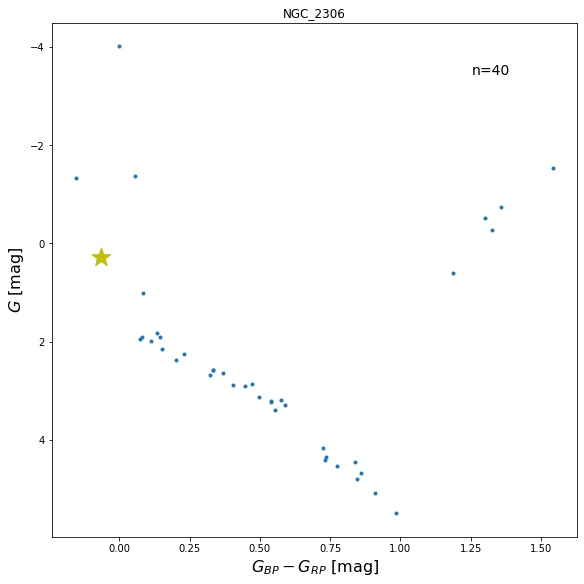

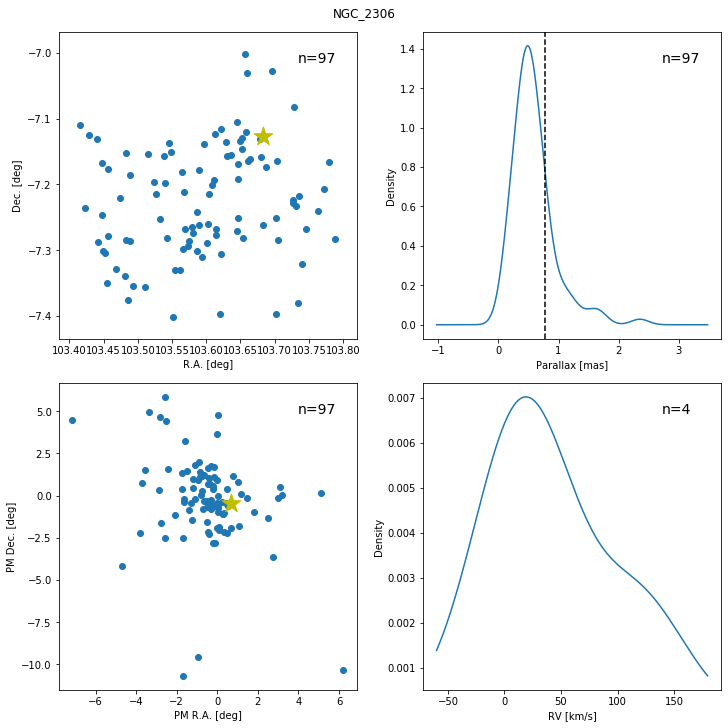

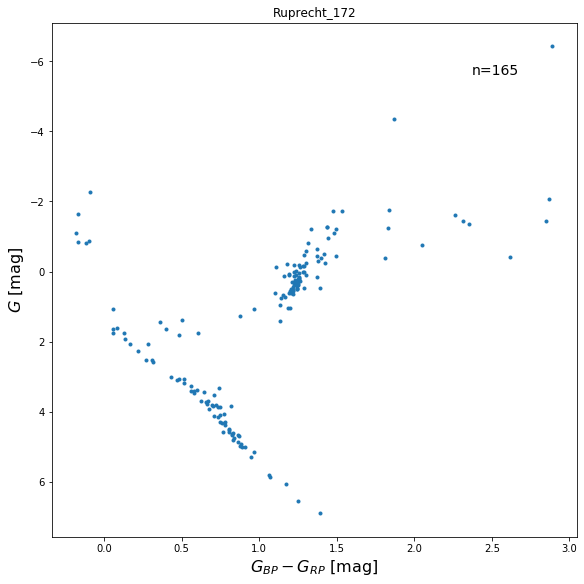

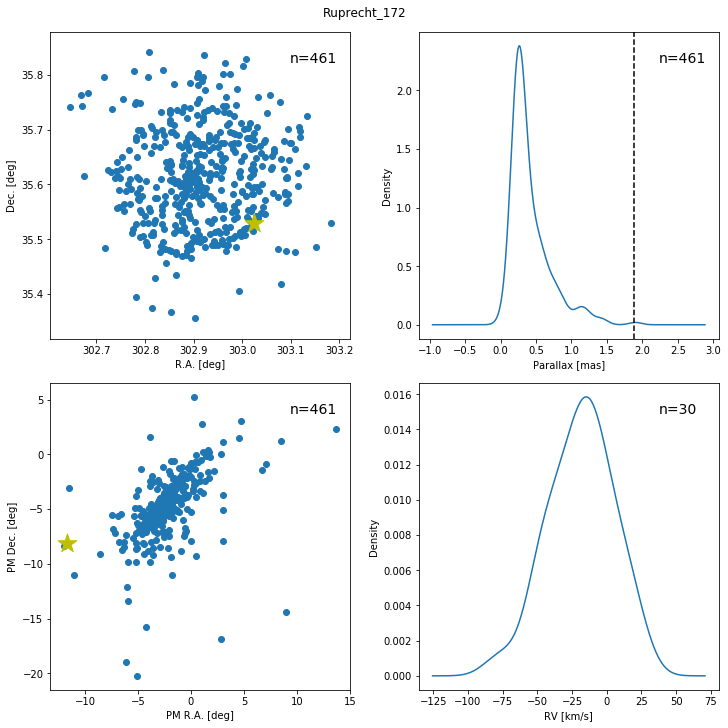

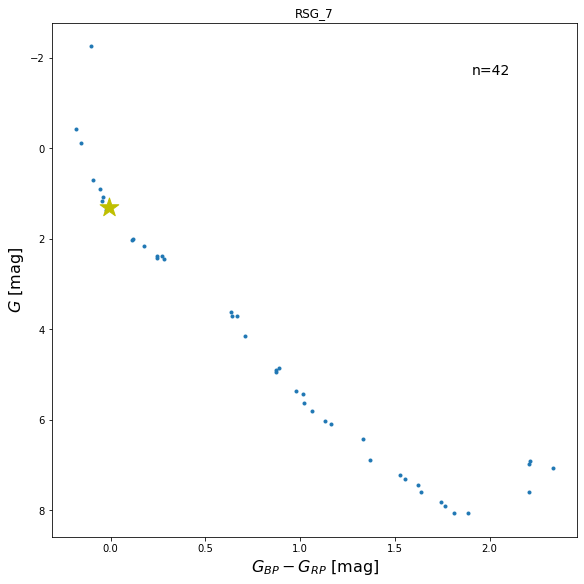

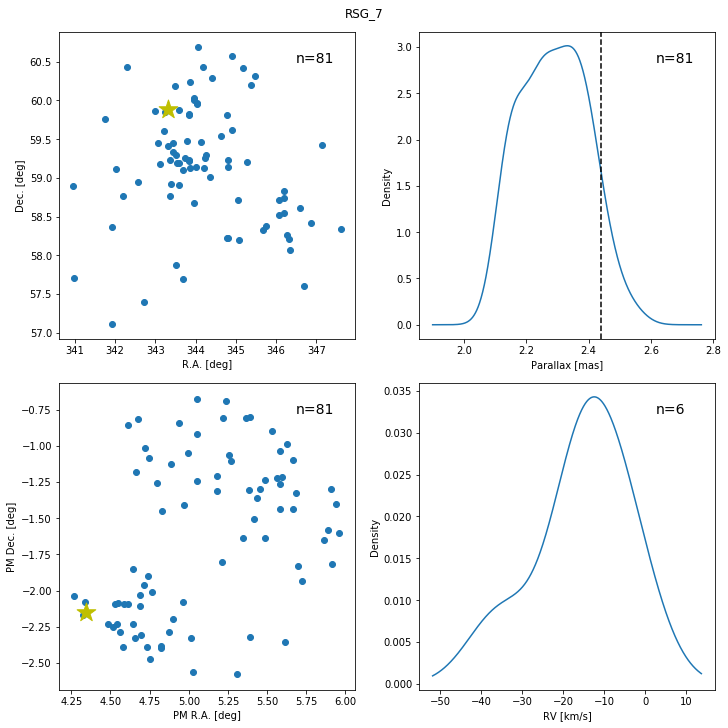

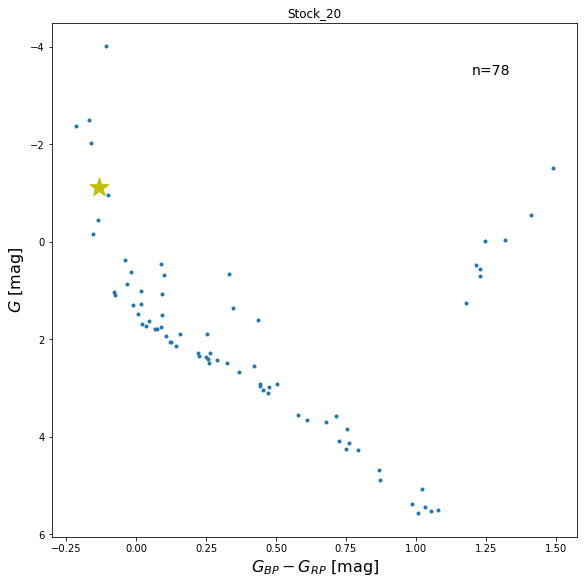

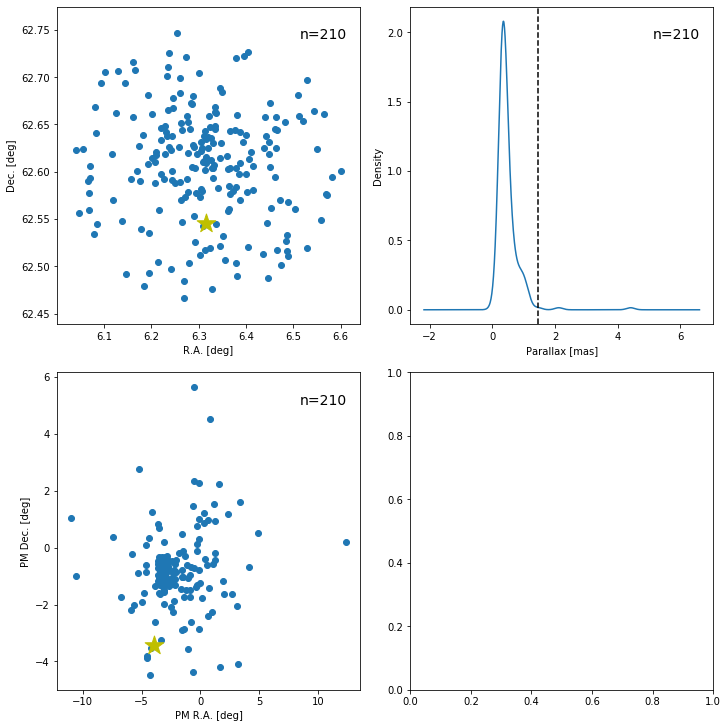

In [24]:
from chronos import Cluster
from chronos.plot import plot_hrd
from chronos.plot import plot_rdp_pmrv

for row in short_list[['source_id','Cluster']].values:
    gaiaid,cluster_name = row
    t = cr.Target(gaiaDR2id=gaiaid)   
    d = t.query_gaia_dr2_catalog(return_nearest_xmatch=True)
    c = cr.Cluster(cluster_name=cluster_name)
#     df_mem = c.query_cluster_members()
    df_gaia_mem = c.query_cluster_members_gaia_params(gmag_cut=None, clobber=False)

    #CMD
    ax = cr.plot_cmd(df=df_gaia_mem, target_gaia_id=t.gaiaid, match_id=True, df_target=t.gaia_params);
    ax.set_title(cluster_name)
    ax.figure.savefig(f'../data/{t.gaiaid}_{cluster_name}_cmd.png')
    
    #kinematics plot
    fig = cr.plot_rdp_pmrv(df=df_gaia_mem, target_gaia_id=t.gaiaid, match_id=False, df_target=t.gaia_params);
    # fig.suptitle(t.nearest_cluster_name)
    fig.suptitle(cluster_name)
    fig.savefig(f'../data/{t.gaiaid}_{cluster_name}_xyz.png')